# PH 509 Semster Project
## Group 8
## Aniket Ghosh, Ankit Mishra, Bhushan Kape, Bikash Kumar Badatya
The following code was use to create the outputs  of the slide presented. \
Each member has 25% contribution.

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.integrate import  simpson as simp
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm


In [2]:

# Wavefunction at t=0
dx = 0.001
sigma = 0.03
x0_1, x0_2 = 480*dx , 800*dx
k1 , k2 = 450., -450.
m1 , m2 = 1, 10
N = 1400


x1 = np.arange(0, (N+1)*dx, dx)
X1 ,X2 = np.meshgrid(x1,x1)
print('len(x1) = ',len(x1))



len(x1) =  1401


Define Gaussian Potential

In [3]:
def V(X, Y):
    V0, alpha = -1000000 , 0.062
    return V0 * np.exp( -np.abs(X-Y)**2 / (2*alpha**2) )

Define Square Well/Barrier Potential

In [ ]:
# #Define repulsive square potential
# def V(X1,X2):
#     Vv = np.zeros((len(x1),len(x1)))
#     V0, alpha = 70000 , 0.062
#     for i in range(len(x1)):
#         for j in range(len(x1)):
#             if (alpha - np.abs(X1[i,j]-X2[i,j])) > .0:
#                 Vv[i,j] = V0
#             else:
#                 Vv[i,j] = .0
#     return Vv


  0%|          | 0/10000 [00:00<?, ?it/s]

Plotting snapshot  1/11 of the complex wavefunction 
Norm =  53.33463366521694


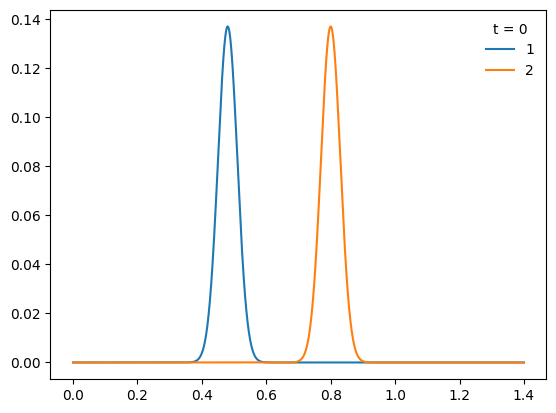

 10%|█         | 1000/10000 [02:32<21:44,  6.90it/s]

Plotting snapshot  2/11 of the complex wavefunction 
Norm =  51.68136098865243


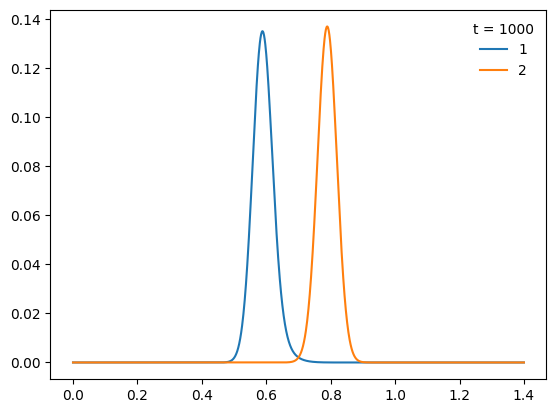

 20%|██        | 2000/10000 [05:03<19:17,  6.91it/s]

Plotting snapshot  3/11 of the complex wavefunction 
Norm =  36.85375002413862


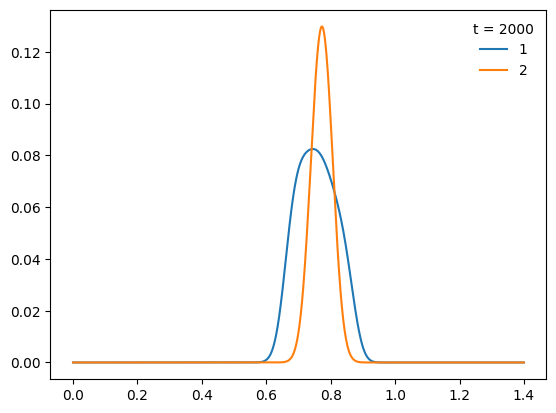

 30%|███       | 3000/10000 [07:30<16:36,  7.02it/s]

Plotting snapshot  4/11 of the complex wavefunction 
Norm =  50.12869974255831


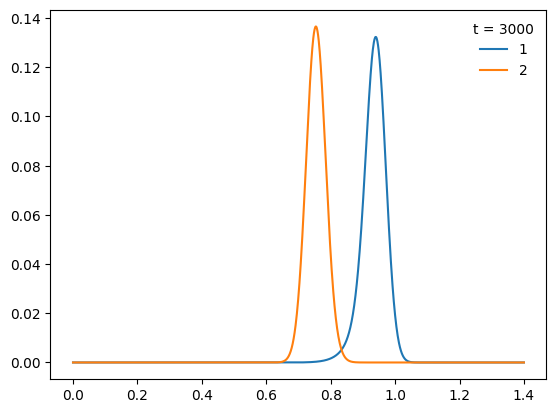

 40%|████      | 4000/10000 [10:02<14:33,  6.87it/s]

Plotting snapshot  5/11 of the complex wavefunction 
Norm =  51.641885891563454


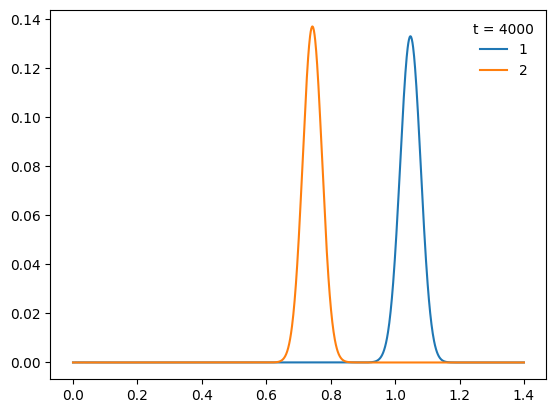

 50%|█████     | 5000/10000 [12:32<12:02,  6.92it/s]

Plotting snapshot  6/11 of the complex wavefunction 
Norm =  50.51426101985877


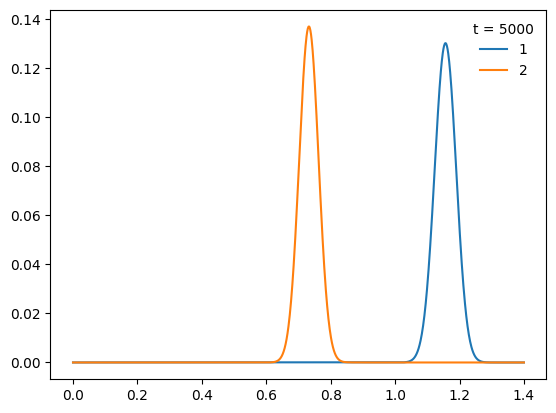

 60%|██████    | 6000/10000 [15:01<10:37,  6.27it/s]

Plotting snapshot  7/11 of the complex wavefunction 
Norm =  49.20796409118752


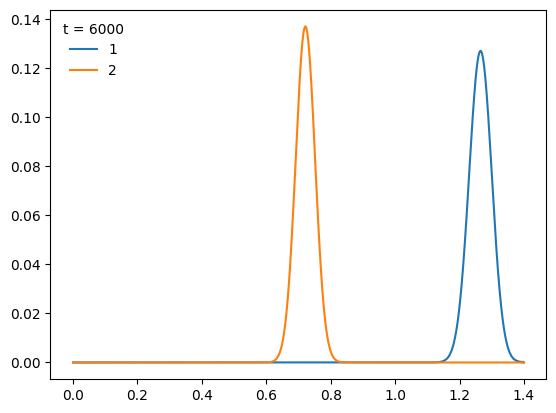

 70%|███████   | 7000/10000 [17:33<07:18,  6.84it/s]

Plotting snapshot  8/11 of the complex wavefunction 
Norm =  71.11215203948375


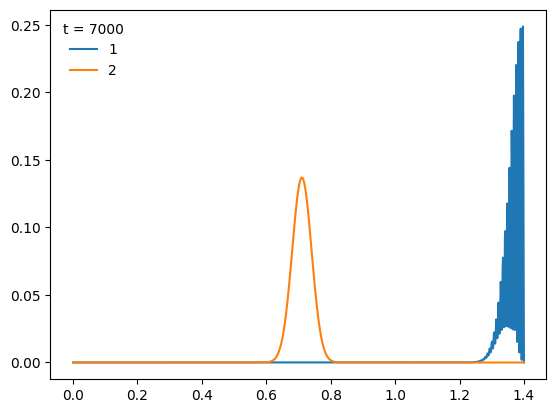

 80%|████████  | 8000/10000 [19:40<03:13, 10.36it/s]

Plotting snapshot  9/11 of the complex wavefunction 
Norm =  46.960471988319156


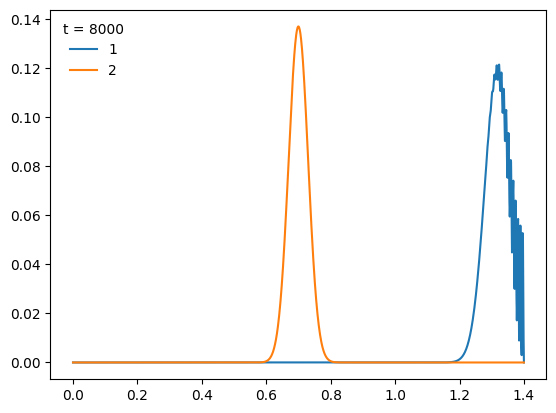

 90%|█████████ | 9000/10000 [21:30<01:35, 10.46it/s]

Plotting snapshot 10/11 of the complex wavefunction 
Norm =  44.934958490540815


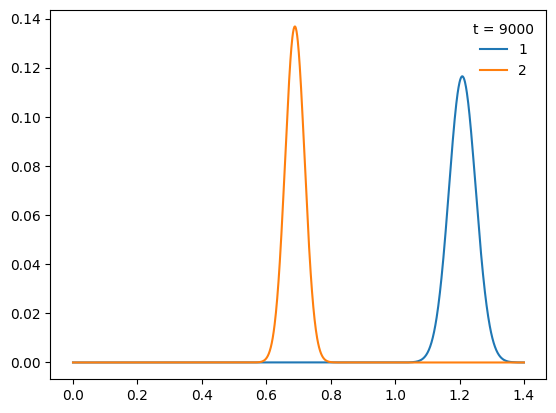

100%|██████████| 10000/10000 [23:16<00:00,  7.16it/s]


In [5]:
# update wavefunction
dt , Nt = 2.5e-7 , 10000
lam = dt/(dx*dx)

#initialise wave function
a1 , a2 = (X1-x0_1)/sigma , (X2-x0_2)/sigma
a3 = np.exp( - (a1*a1 + a2*a2)/4.)
b1 = k1*X1 + k2*X2
ww = ( k1*k1/(2.*m1) + k2*k2/(2.*m2) )*0.5*dt

R_curr = np.cos(b1)*a3
I_curr = np.sin(b1)*a3


# Set zero at boundary
I_curr[:,0] , I_curr[:,-1] ,I_curr[0,:], I_curr[-1,:]= .0,.0,.0,.0
R_curr[:,0] , R_curr[:,-1] ,R_curr[0,:], R_curr[-1,:]= .0,.0,.0,.0

R_prev = R_curr
I_prev = I_curr

Vx = V(X1,X2)

j = 0
rho1  = np.zeros(len(x1))
rho2  = np.zeros(len(x1))
Nplots = np.arange(0,Nt+1,1000)
for i in tqdm(range(Nt)):
    a1 = (1./m1 + 1./m2)*lam + dt*Vx
    # 1 for colshift, 0 for rows shift
    a2 = 0.5*(np.roll(I_curr,-1,1) + np.roll(I_curr,1,1))/m1
    a3 = 0.5*(np.roll(I_curr,-1,0) + np.roll(I_curr,1,0))/m2
    R = R_prev + 2*(a1*I_curr - lam*(a2 +a3))

    a1 = (1./m1 + 1./m2)*lam + dt*Vx
    # 1 for colshift, 0 for rows shift
    a2 = 0.5*(np.roll(R_curr,-1,1) + np.roll(R_curr,1,1))/m1
    a3 = 0.5*(np.roll(R_curr,-1,0) + np.roll(R_curr,1,0))/m2
    I = I_prev - 2*(a1*R_curr - lam*(a2 +a3))

    # psi_next = psi_next/norm(psi_next)
    I[:,0], I[:,-1] = .0, .0
    I[0,:], I[-1,:] = .0, .0
    R[:,0], R[:,-1] = .0, .0
    R[0,:], R[-1,:] = .0, .0

    if  i in Nplots:
        print('Plotting snapshot %2d/%2d of the complex wavefunction '%(j+1, len(Nplots)))
        print('Norm = ',norm(R*R + I*I))
        rho = R*R + I*I
        # 3D plot
        # rho = rho/norm(rho)
        # fig = plt.figure()
        # ax = fig.add_subplot( projection='3d')
        # ax.plot_wireframe(X1, X2,rho)#, cstride=60 ,rstride=60)
        # ax.set_xlabel('X1'), ax.set_ylabel('X2')

        # 2d plot

        fig = plt.figure()
        ax = fig.add_subplot()
        for k in range(len(x1)):
          rho1[k] = simp(rho[:,k],X2[:,k])
          rho2[k] = simp(rho[k,:],X1[k,:])
        rho1 = rho1/norm(rho1)
        rho2 = rho2/norm(rho2)
        plt.plot(x1,rho1,label = '1'), plt.plot(x1,rho2,label='2')
        plt.legend(title='t = %i'%i)
        plt.rcParams["legend.frameon"] = False
        # plt.savefig('./image/%2d.png'%(i))
        # plt.close(fig)

        j = j+1 #-- prepare for next snapshot
        # plt.show()

    I_prev = I_curr
    I_curr = I
    R_prev = R_curr
    R_curr = R

So we see that the

In [ ]:
# !zip -r '/content/image/"FileName.zip"' '/content/image/'